# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
df_image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [7]:
'''import pandas as pd
import json
from timeit import default_timer as timer

# ... (Your authentication code here)
consumer_key = '...................'
consumer_secret = '...................'
access_token = '...................'
access_secret = '...................'

tweet_ids = twitter_archive.tweet_id.values
count = 0
fails_dict = {}
tweet_data = []  # Create a list to store the extracted data

start = timer()
# This loop will likely take 20-30 minutes to run because of Twitter's rate limit
for tweet_id in tweet_ids:
    count += 1
    print(str(count) + ": " + str(tweet_id))
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        print("Success")
        # Extract the desired fields and add them to the tweet_data list
        tweet_data.append({
            'tweet_id': tweet.id,
            'favorite_count': tweet.favorite_count,
            'retweet_count': tweet.retweet_count
        })
    except tweepy.errors.TweepyException as e:
        print("Fail")
        fails_dict[tweet_id] = e
        pass
end = timer()

# Create a pandas DataFrame from the tweet_data list
tweet_df = pd.DataFrame(tweet_data)

# Display the DataFrame
print(tweet_df)
print("Time taken:", end - start)
print(fails_dict)'''


'import pandas as pd\nimport json\nfrom timeit import default_timer as timer\n\n# ... (Your authentication code here)\nconsumer_key = \'...................\'\nconsumer_secret = \'...................\'\naccess_token = \'...................\'\naccess_secret = \'...................\'\n\ntweet_ids = twitter_archive.tweet_id.values\ncount = 0\nfails_dict = {}\ntweet_data = []  # Create a list to store the extracted data\n\nstart = timer()\n# This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\nfor tweet_id in tweet_ids:\n    count += 1\n    print(str(count) + ": " + str(tweet_id))\n    try:\n        tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n        print("Success")\n        # Extract the desired fields and add them to the tweet_data list\n        tweet_data.append({\n            \'tweet_id\': tweet.id,\n            \'favorite_count\': tweet.favorite_count,\n            \'retweet_count\': tweet.retweet_count\n        })\n    except tweepy.errors.

In [8]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
df_tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# This section will go over the following:

## Quality Issues
1. Completeness
2. Validity
4. Accuracy
5. Consistency
## Tidiness Issues
1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

### twitter_archive table

In [9]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df_twitter_archive.duplicated().sum()

0

In [13]:
df_twitter_archive.tweet_id.duplicated().sum()

0

In [14]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [15]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [16]:
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### image_prediction table

In [18]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_image_prediction.tweet_id.duplicated().sum()

0

In [22]:
df_image_prediction.jpg_url.duplicated().sum()

66

In [23]:
df_image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [24]:
df_image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [25]:
df_image_prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

### tweet_json table

In [26]:
df_tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [27]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [28]:
df_tweet_json.duplicated().sum()

0

In [29]:
df_tweet_json.favorite_count.mean()

8080.968564146135

In [30]:
df_tweet_json.retweet_count.mean()

3164.7973661852166

### Quality issues

#### twitter_archive:

##### Completeness:
- missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- tweet_id is an int (applies to all tables)
##### Validity:
- dog names: some dogs have 'None' as a name, or 'a', or 'an.'
- this dataset includes retweets, which means there is duplicated data (as a result, these columns will be empty: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)
##### Accuracy:
- timestamp is an object and  remove +0000 in timestamp
- retweeted_status_timestamp is also an object (the other retweeted statuses are floats)
- rating_numerator goes up to 1776
##### Consistency:
- rating_denominator should be a standard 10, but there are a multitude of other values
- the source column still has the HTML tags


#### image_prediction table:
##### Validity:
- p1, p2 and p3 columns have invalid data and many entries are not dogs, e.g., jaguar, mailbox, peacock, cloak, etc.
##### Consistency:
- p1, p2 and p3 columns aren't consistent when it comes to capitalization: sometimes the dog breed listed is all lowercase, sometimes it is written in Sentence Case.
- in p1, p2 and p3 columns there is an underscore for multi-word dog breeds
- jpg url duplicates


#### tweet_json table
##### Completeness:
- missing some data



### Tidiness issues

##### twitter_archive table:
- The last four columns all relate to the same variable (dogoo, floofer, pupper, puppo), should be in one column.
- The three tables should be combined into one since they're all related to the same type of observational unit according to tidy data requirements.

##### images_prediction table:
- this data set is part of the same observational unit as the data in the archive - one table with all basic information about the dog ratings

##### twitter_json table:
- this data set is also part of the same observational unit - one table with all basic information about the dog ratings

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data

df_twitter_archive_clean = df_twitter_archive.copy()
df_image_prediction_clean = df_image_prediction.copy()
df_tweet_json_clean = df_tweet_json.copy()


## Quality Issue

## twitter_archive

### Issue #1:we will keep original ratings, delete retweets and replies

#### Define:Use isnull() to filter and only keep rows where retweeted_status_id column is NaN. Same method applies to in_reply_to_status_id

#### Code

In [32]:
# Remove retweets
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isnull()]

# Remove replies
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id.isnull()]

#### Test

In [33]:
df_twitter_archive_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2:drop columns that are related to retweets and replies. After dropping those columns, datatype issue with those columns will no longer be an issue

#### Define:Use df.drop to delete in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.

#### Code

In [34]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

#### Test

In [35]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3: datatype for timestamp should be datetime, remove +0000

#### Define: convert timestamp from str to datetime and Remove +0000

#### Code



In [36]:
# Remove +0000
df_twitter_archive_clean.timestamp = df_twitter_archive_clean.timestamp.str[:-6]

In [37]:
df_twitter_archive_clean['timestamp'] = df_twitter_archive_clean['timestamp'].map(pd.to_datetime)

#### Test

In [38]:
df_twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #4:  replace the long url with different category names from the source column

#### Define: Use replace to replace the url 

#### Code

In [39]:
df_twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [40]:
df_twitter_archive_clean.source = df_twitter_archive_clean.source.replace({
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'
})

#### Test

In [41]:
df_twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

## image_prediction

### Issue #5: delete p1_dog, p2_dog, p3_dog column that are not dogs. Same for twitter_archive and tweet_json.

#### Define: use isin and ~ to filter and delete rows that are False in p1_dog, p2_dog, p3_dog column in all three dataframes.

#### Code

In [42]:
# Number of rows before data cleaning
print(df_image_prediction_clean.shape)
print(df_twitter_archive_clean.shape)
print(df_tweet_json_clean.shape)

(2075, 12)
(2097, 12)
(2354, 3)


In [43]:
#df_image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = df_image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

In [44]:
df_image_prediction_clean = df_image_prediction_clean[~df_image_prediction_clean.tweet_id.isin(drop_list)]
df_twitter_archive_clean = df_twitter_archive_clean[~df_twitter_archive_clean.tweet_id.isin(drop_list)]
df_tweet_json_clean = df_tweet_json_clean[~df_tweet_json_clean.tweet_id.isin(drop_list)]

#### Test

In [45]:
# Number of rows after data cleaning
print(df_image_prediction_clean.shape)
print(df_twitter_archive_clean.shape)
print(df_tweet_json_clean.shape)

(1751, 12)
(1792, 12)
(2031, 3)


### Issue #6:Standardize dog ratings

#### Define: use .astype() to convert ratings into float, gather decimal type text, indices, and ratings for tweets, create a new column called rating, and calulate the value with new, standardized ratings

#### Code

In [46]:
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean['rating_numerator'].astype(float)
df_twitter_archive_clean['rating_denominator'] =df_twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [47]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1792 non-null   int64         
 1   timestamp           1792 non-null   datetime64[ns]
 2   source              1792 non-null   object        
 3   text                1792 non-null   object        
 4   expanded_urls       1789 non-null   object        
 5   rating_numerator    1792 non-null   float64       
 6   rating_denominator  1792 non-null   float64       
 7   name                1792 non-null   object        
 8   doggo               1792 non-null   object        
 9   floofer             1792 non-null   object        
 10  pupper              1792 non-null   object        
 11  puppo               1792 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 182.0+ KB


#### Code

In [48]:
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating

import re

ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in df_twitter_archive_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
ratings_decimals_text

C:\Users\subro\AppData\Local\Temp\ipykernel_13948\2546700450.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, text in df_twitter_archive_clean['text'].iteritems():


['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [49]:
for idx, rating_decimal in zip(ratings_decimals_index, ratings_decimals):
    df_twitter_archive_clean.loc[idx, 'rating_numerator'] = float(rating_decimal)

#### Test

In [50]:
df_twitter_archive_clean.loc[40]

tweet_id                                             884562892145688576
timestamp                                           2017-07-11 00:00:02
source                                               Twitter for iPhone
text                  This is Kevin. He's just so happy. 13/10 what ...
expanded_urls         https://twitter.com/dog_rates/status/884562892...
rating_numerator                                                   13.0
rating_denominator                                                 10.0
name                                                              Kevin
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 40, dtype: object

#### Code

In [51]:
# Create a new column called rating, and calulate the value with new, standardized ratings
df_twitter_archive_clean['rating'] = df_twitter_archive_clean['rating_numerator'] / df_twitter_archive_clean['rating_denominator']

#### Test

In [52]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,1.2
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None,1.3


### Issue #7:image_prediction: we only need the most confident prediction for the image

#### Define:Add two columns for breed and confidence level.
- Create a function to sort through the predictions and identify the one that is most confident to be a breed of dog. The most cconfident prediction is p1, which is followed by p2 and p3.
- Removing any unnecessary columns.

#### Code

In [53]:
# Create a breed column and a confident_level column
breed = []
confident_level = []

# Create a function to find the most confident prediction that is a dog breed
# p1 is the most confident prediction, followed by p2 and p3
def image_pred(df_image_prediction_clean):
    if df_image_prediction_clean.p1_dog == True:
        breed.append(df_image_prediction_clean.p1)
        confident_level.append(df_image_prediction_clean.p1_conf)
    elif df_image_prediction_clean.p2_dog == True:
        breed.append(df_image_prediction_clean.p2)
        confident_level.append(df_image_prediction_clean.p2_conf)
    elif df_image_prediction_clean.p3_dog == True:
        breed.append(df_image_prediction_clean.p3)
        confident_level.append(df_image_prediction_clean.p3_conf)
    else:
        breed.append('Unknown_breed')
        confident_level.append(0)
        
# Apply the function by column        
df_image_prediction_clean.apply(image_pred, axis=1)

# Add the breed and confident_level column to image_prediction_clean 
df_image_prediction_clean['breed'] = breed
df_image_prediction_clean['confident_level'] = confident_level

# Drop columns no longer needed
df_image_prediction_clean = df_image_prediction_clean.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

#### Test

In [54]:
df_image_prediction_clean.head()

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Issue 8:capitalization in breed column

#### Define:Use str.capitalize to capitalize the first letter of breed column

#### Code

In [55]:
df_image_prediction_clean.breed = df_image_prediction_clean.breed.str.capitalize()

#### Test

In [56]:
df_image_prediction_clean.head(10)

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden_retriever,0.775930


# Tidiness

### Issue #1:Create one column for the various dog types: doggo, floofer, pupper, puppo

#### Define: use str.extract to extact the text and create a new column dog_types

#### Code

In [57]:
# Extract the text from the columns into the new dog_type colunn
df_twitter_archive_clean['dog_type'] = df_twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
# remove the columns
columns_to_remove = ['doggo', 'floofer', 'pupper', 'puppo']
df_twitter_archive_clean.drop(columns=columns_to_remove, inplace=True)

#### Test

In [58]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_type
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,1.2,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,1.3,NaN


### Issue #2:df_tweet_json should be part of the df_ twitter_archive table and df_image_prediction should be part of the df-twitter_archive table.

#### Define: 
- Merge the retweet_count, favorite_count column to the twitter_archive table, joining on tweet_id .
- Use merge to merge the image_prediction table to the twitter_archive table, joining on tweet_id.
- Use notnull to filter nonnull rows and only keep nonnull rows.

#### Code

In [59]:
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweet_json_clean,
                            on = ['tweet_id'], how = 'left')

#### Test

In [60]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_type,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,1.3,NaN,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,1.2,NaN,4328,25461
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,1.3,NaN,8964,42908
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,1.2,NaN,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,1.3,NaN,3261,20562


In [61]:
# Merge tables
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_prediction_clean,
                            on = ['tweet_id'], how = 'left')

# number of null values before cleaning
df_twitter_archive_clean.jpg_url.isnull().sum()

126

In [62]:
df_twitter_archive_clean = (df_twitter_archive_clean[df_twitter_archive_clean.jpg_url.notnull()])

#### Test

In [63]:
df_twitter_archive_clean.jpg_url.isnull().sum()

0

# Storing Data

In [64]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
df_twitter_archive_clean.to_csv('twitter_archive_master.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

In [65]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_type,retweet_count,favorite_count,jpg_url,breed,confident_level
0,0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,1.3,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,1.2,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2,2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,1.3,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
3,3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,1.2,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712
4,4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,1.3,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1666 non-null   int64  
 1   tweet_id            1666 non-null   int64  
 2   timestamp           1666 non-null   object 
 3   source              1666 non-null   object 
 4   text                1666 non-null   object 
 5   expanded_urls       1666 non-null   object 
 6   rating_numerator    1666 non-null   float64
 7   rating_denominator  1666 non-null   float64
 8   name                1666 non-null   object 
 9   rating              1666 non-null   float64
 10  dog_type            270 non-null    object 
 11  retweet_count       1666 non-null   int64  
 12  favorite_count      1666 non-null   int64  
 13  jpg_url             1666 non-null   object 
 14  breed               1666 non-null   object 
 15  confident_level     1666 non-null   float64
dtypes: flo

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Visualization

### Insights:1- Popular dog breed based on rating

In [67]:
df.breed.value_counts()

Golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
Pug                    62
                     ... 
Entlebucher             1
Japanese_spaniel        1
Standard_schnauzer      1
Silky_terrier           1
Irish_wolfhound         1
Name: breed, Length: 113, dtype: int64

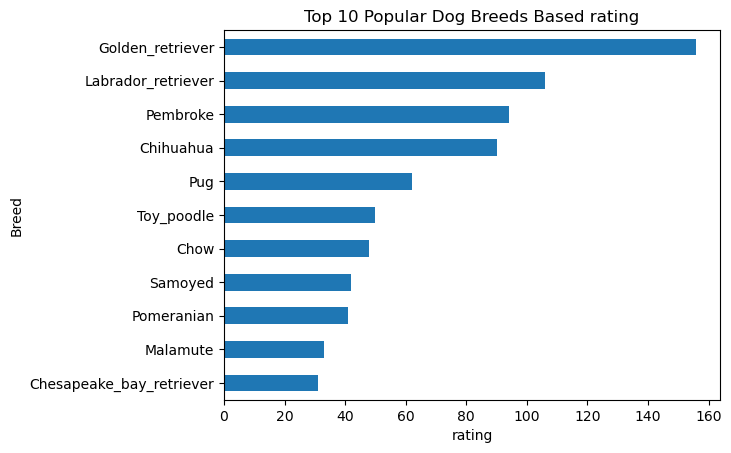

In [68]:
# Plot bar chart for top 10 popular breeds based on number of posts
df.breed.value_counts()[10::-1].plot(kind = 'barh', title = 'Top 10 Popular Dog Breeds Based rating')
plt.xlabel('rating')
plt.ylabel('Breed');

###### from the graph, we can clearly see that Golden retriever is the most popular dog breed inr rating. Labrador_retriever is the second popular breed but Cocker and Malamute are the least among all

# Insight2: Top 10 Breeds Based on Favorite Count and retweet_count

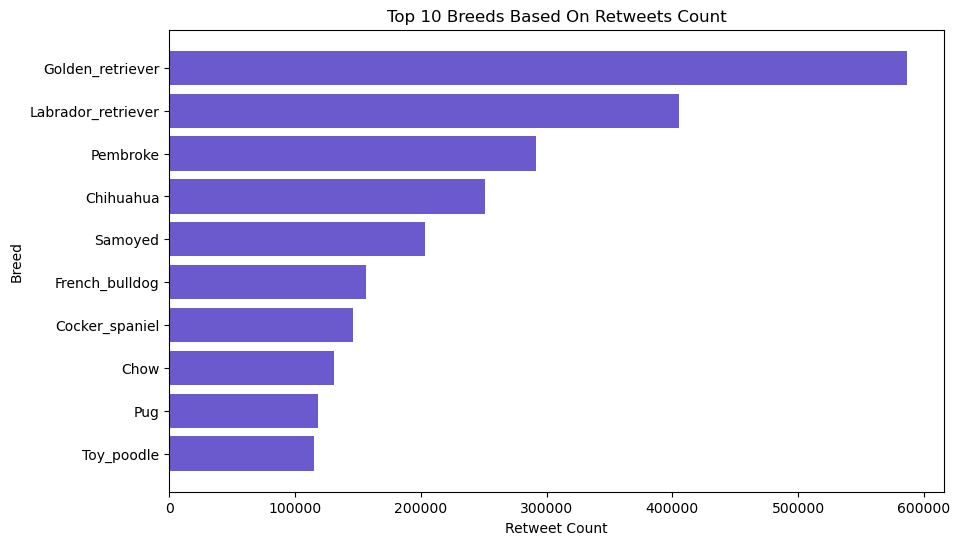

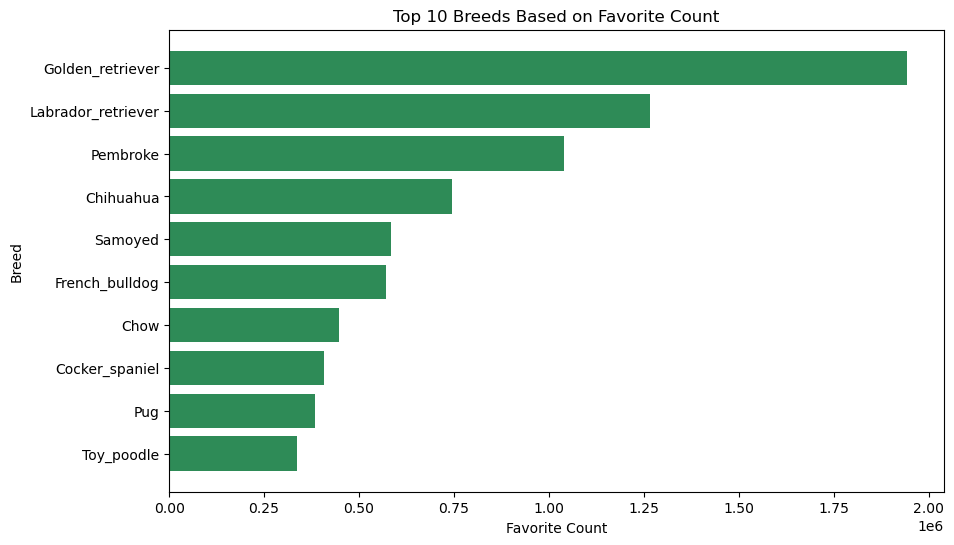

In [69]:
# Select columns of interest
columns = ['breed', 'retweet_count', 'favorite_count']
df_breed = df[columns]

# Group and aggregate data for retweets and favorites
breed_retweet = df_breed.groupby('breed')['retweet_count'].sum().nlargest(10).sort_values()
breed_favorite = df_breed.groupby('breed')['favorite_count'].sum().nlargest(10).sort_values()

# Plot horizontal bar chart for retweets
plt.figure(figsize=(10, 6))
plt.barh(breed_retweet.index, breed_retweet.values, color='#6A5ACD')
plt.title("Top 10 Breeds Based On Retweets Count")
plt.xlabel('Retweet Count')
plt.ylabel('Breed')

# Show the plot
plt.show()

# Plot horizontal bar chart for favorites
plt.figure(figsize=(10, 6))
plt.barh(breed_favorite.index, breed_favorite.values, color='#2E8B57')
plt.title("Top 10 Breeds Based on Favorite Count")
plt.xlabel('Favorite Count')
plt.ylabel('Breed')

# Show the plot
plt.show()


**So, top favourite:Golden Retriever and top retweet:Golden Retriever**

# Insight3: Confidence Levels for Different Dog Types

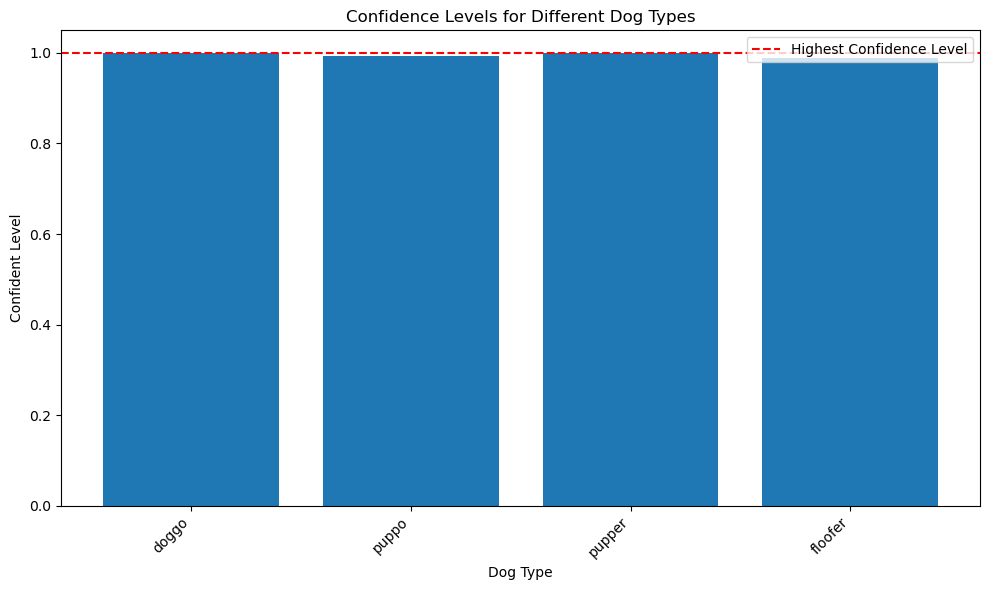

In [70]:
# Filter rows with non-null values in 'dog_type' and 'confident_level'
filtered_df = pd.DataFrame(df)
filtered_df = filtered_df.dropna(subset=['dog_type', 'confident_level'])

# Find the 'dog_type' with the highest confidence level
highest_conf_dog_type = filtered_df.loc[filtered_df['confident_level'].idxmax(), 'dog_type']
highest_conf_level = filtered_df['confident_level'].max()

# Plot the confidence levels for each dog type
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['dog_type'], filtered_df['confident_level'], color='#1f77b4')
plt.title("Confidence Levels for Different Dog Types")
plt.xlabel('Dog Type')
plt.ylabel('Confident Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Highlight the dog type with the highest confidence level
plt.axhline(y=highest_conf_level, color='red', linestyle='--', label='Highest Confidence Level')
plt.legend()

# Show the plot
plt.show()

**So, doggo and pupper have the highest Confidence Levels for Different Dog Types**

# Insight4: Distribution of Dog Types

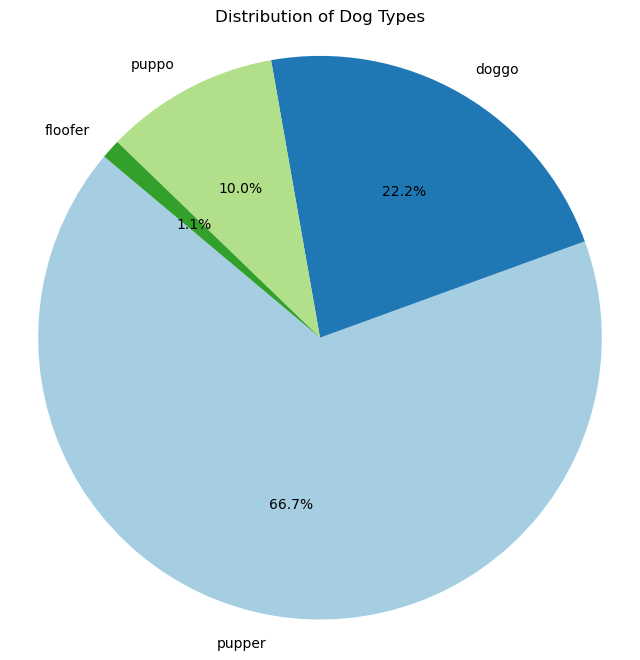

In [71]:
dog_type_counts = filtered_df['dog_type'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(dog_type_counts, labels=dog_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Dog Types")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

**pupper is the most frequent do type**

# Insight5:Total Number of Tweets Over Time

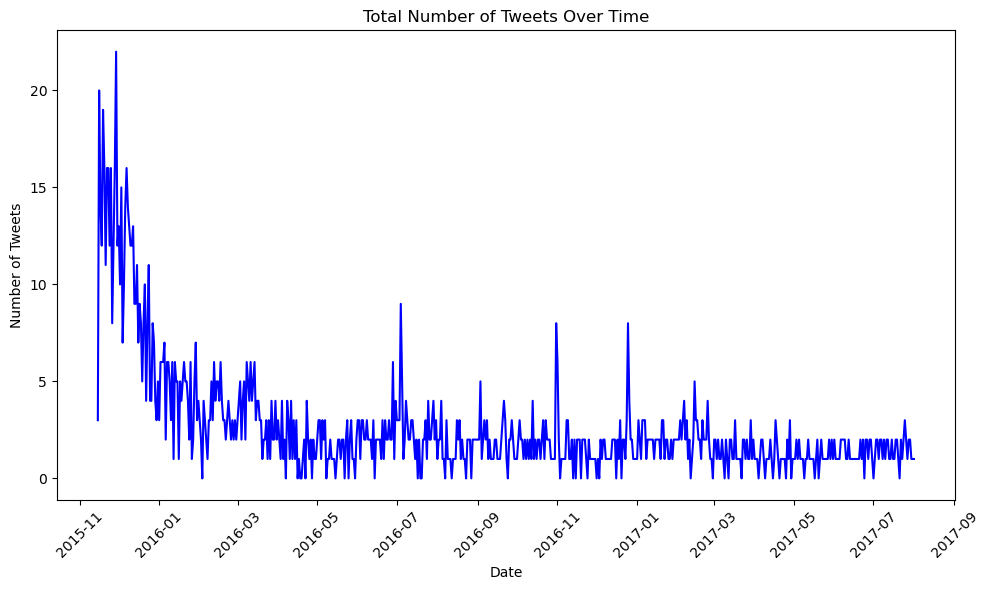

In [72]:
from datetime import datetime
# Convert timestamp strings to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the timestamp column as the DataFrame index
df.set_index('timestamp', inplace=True)

# Resample the data to daily frequency and count the number of tweets per day
daily_tweet_count = df.resample('D').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_tweet_count.index, daily_tweet_count.values, linestyle='-', color='b')
plt.title("Total Number of Tweets Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Number of tweet had decreased over time with spikes at the beginning**